In [92]:
import pandas as pd
data = pd.read_csv('data/IRIS.csv')


In [93]:
df = data.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [97]:
df['species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

Le dataset sur les fleurs d'iris possède au total 150 observations par ailleurs , aucune colonne ne contient de valeurs manquantes, ce qui est très bien pour la suite. Nous avons trois classes de fleurs à savoir : Iris-setosa(la plus fréquente parmis les observations), Iris-virginica et Iris-versicolor.
Iris-setosa étant , le mode e notre dataset, puisqu'il apparaît exactement 50 fois, celà indique que les deux autres catégories de notre dataset apparaissent également 50fois chacune (150/3=50). par conséquent, notre jeu de donnée est équilibré, le modèle aura donc autat d'exemple pour chaque fleurs, ce qui réduit le risque de biais élevé.

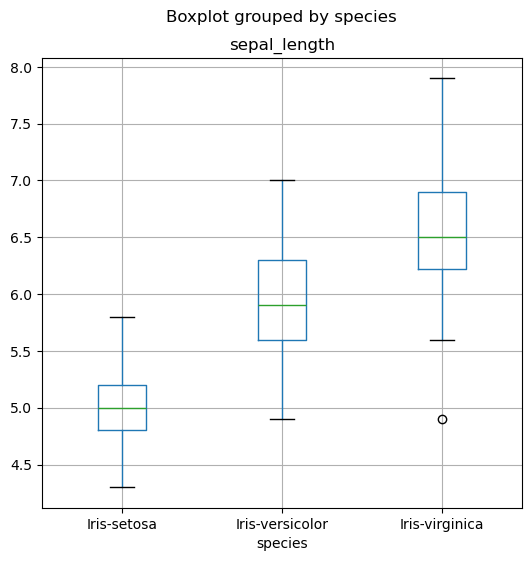

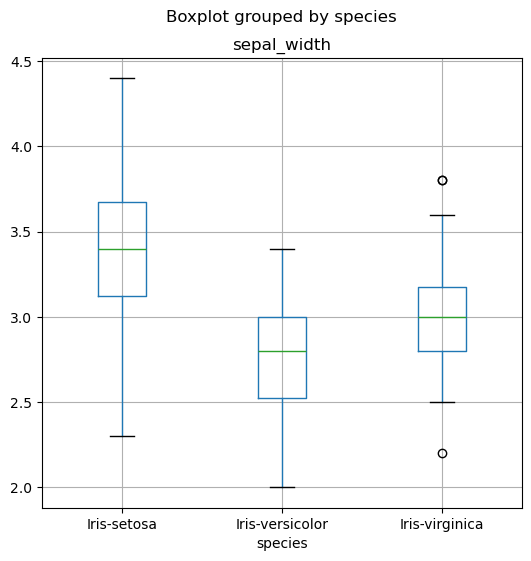

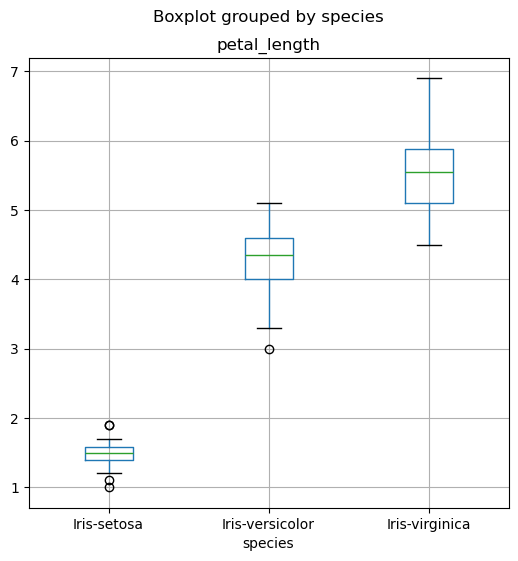

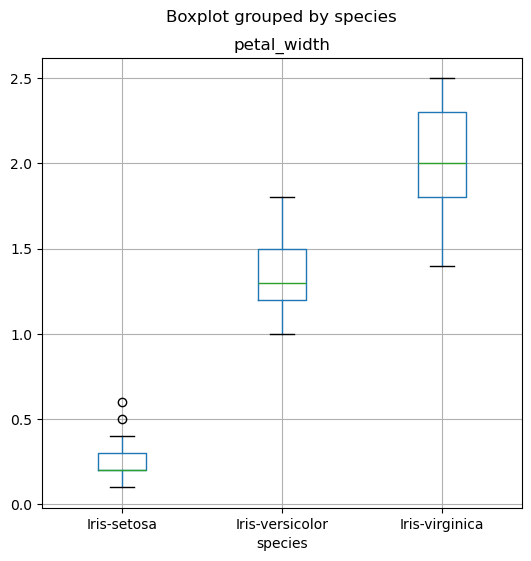

In [98]:
import matplotlib.pyplot as plt 
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label = ['species']

for col in features:
    df.boxplot(column=col, by='species', figsize=(6,6))
    plt.title(col)
    

D'après ces graphiques, on constate que toutes les variables sont à même de permettre de distinguer les différentes espèces. l'espèce setosa est l'espèce qui se différencie le mieux des trois , les deux autres on des similarités légère.

In [99]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='species')
y=df['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


numeric_transformer= Pipeline([
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer([
    ('numerical', numeric_transformer, features),
])

## Premier modèle : Regression logistique
 

In [101]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classification', LogisticRegression(max_iter=1000) )
])

model1 = pipeline.fit(x_train, y_train)

predictions= model1.predict(x_test)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



le modèle a très bien identifier les différentes catégories de fleures, sans aucune erreurs apparantes, nottament due au faite que notre dataset est équilibré. Pour plus de vérification , effectuons une cross-validation pour voir si notre modèle se comporte toujours aussi bien sur difféentes découpes de nos données 

In [103]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model1, x,y, cv = 5)

print(f"Scores pour chaque pli: {scores}")
print(f"Précision moyenne : {scores.mean():.2f}")
print(f"Ecart-type (stabilité) : {scores.std():.2f}")

Scores pour chaque pli: [0.96666667 1.         0.93333333 0.9        1.        ]
Précision moyenne : 0.96
Ecart-type (stabilité) : 0.04


CONCLUSION : les scores obtenus pour chaque découpages nous prouvent que le modèle n'est pas en overfitting. il à une moyenne de prédiction de 0.96 et une faible variance de 0.04
Le modèle est donc capable de généraliser ses connaissances à de nouvelles données qu'il n'a jamais vu 

In [106]:
import joblib

filename = 'modeles/Iris_logisticRegression.pkl'
joblib.dump(model1, filename)

['modeles/Iris_logisticRegression.pkl']

## modèle 2 : KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classification',  KNeighborsClassifier(n_neighbors=5))
])

model2 = pipeline.fit(x_train, y_train)

predictions_2 = model2.predict(x_test)

In [108]:

print(confusion_matrix(y_test, predictions_2))
print(classification_report(y_test, predictions_2))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classification__n_neighbors': range(1, 21),
    'classification__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print(f"Meilleur K trouvé : {grid_search.best_params_}")
print(f"Meilleure précision : {grid_search.best_score_:.2f}")

Meilleur K trouvé : {'classification__n_neighbors': 7, 'classification__weights': 'distance'}
Meilleure précision : 0.95


In [110]:
prediction__2 = grid_search.predict(x_test)


print(confusion_matrix(y_test, prediction__2))
print(classification_report(y_test, prediction__2))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



CONCLUSION : les résultats obtenus précédemment réflètent bel et bien la performance réél du modèle.

In [111]:
import joblib

filename = 'modeles/knn.pkl'
joblib.dump(grid_search, filename)

['modeles/knn.pkl']

## Modèle 3 : Arbre de décision 

In [112]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classification',  DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'classification__max_depth': [3, 5, 10, None],
    'classification__min_samples_leaf': [1, 2, 5, 10],
    'classification__criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(pipeline, param_grid, cv=5)
grid_tree.fit(x_train, y_train)

print(f"Meilleur K trouvé : {grid_tree.best_params_}")
print(f"Meilleure précision : {grid_tree.best_score_:.2f}")

Meilleur K trouvé : {'classification__criterion': 'gini', 'classification__max_depth': 3, 'classification__min_samples_leaf': 2}
Meilleure précision : 0.95


In [113]:
prediction_3 = grid_tree.predict(x_test)
print(confusion_matrix(y_test, prediction__2))
print(classification_report(y_test, prediction__2))


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



[Text(0.375, 0.875, 'petal_length <= -0.825\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = Virginica'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal_width <= 0.671\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = Virginica'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal_length <= 0.638\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Versicolor'),
 Text(0.125, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Versicolor'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Virginica'),
 Text(0.75, 0.375, 'petal_length <= 0.582\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = Virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = Virginica')]

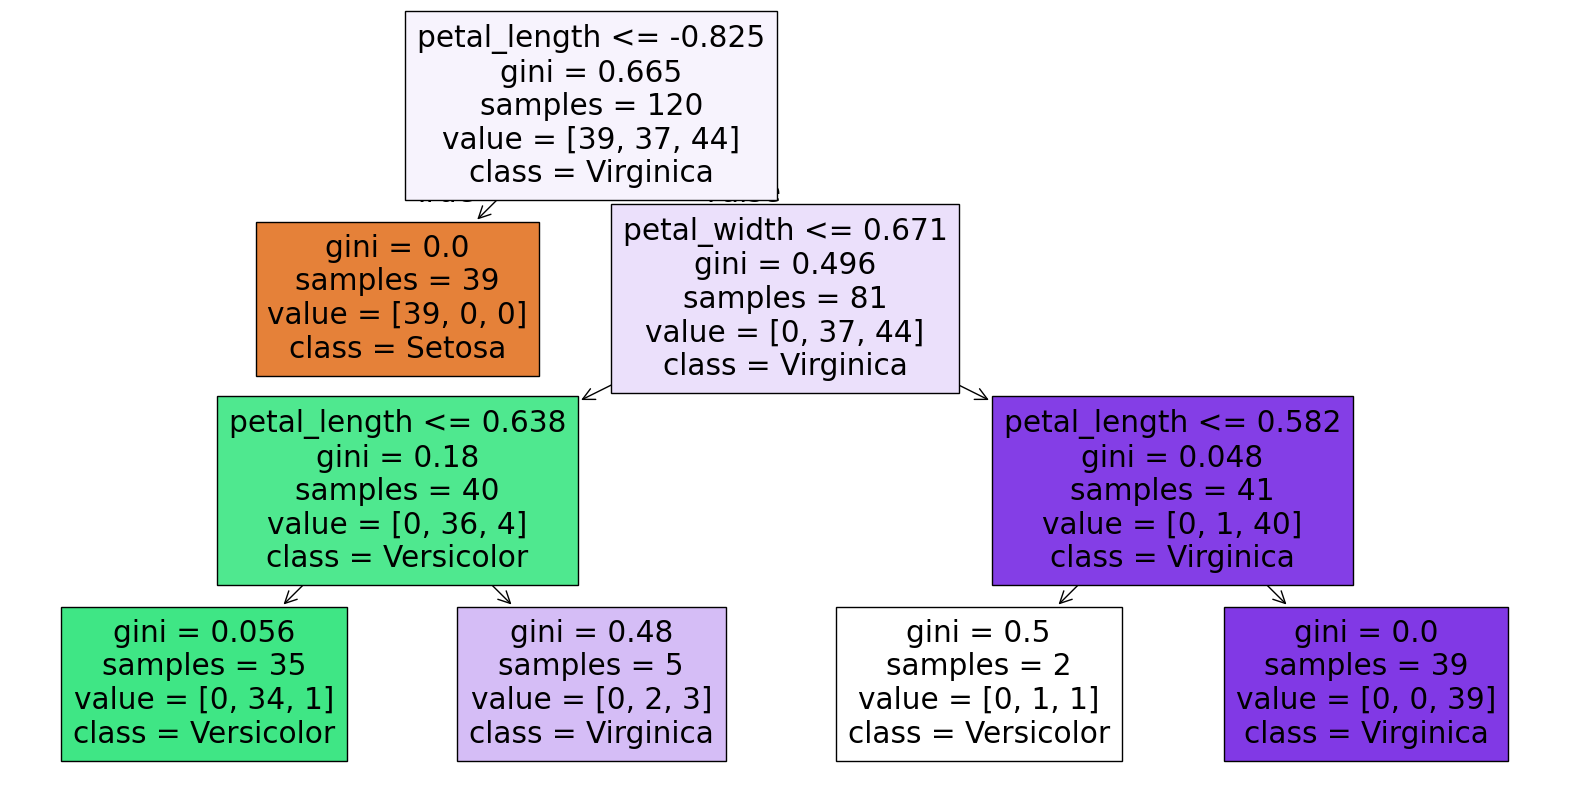

In [114]:
from sklearn.tree import plot_tree

class_cols = ['Setosa', 'Versicolor', 'Virginica']

best_pipeline = grid_tree.best_estimator_

tree_model = best_pipeline.named_steps['classification']

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=features, class_names=class_cols, filled=True) # type: ignore

ce modèle est égament bon avec une précison optimale de 0.95

In [116]:
filename = 'modeles/decisionTree.pkl'
joblib.dump(grid_tree, filename)

['modeles/decisionTree.pkl']

## Modèle 4 : SVM

In [117]:
from sklearn.svm import SVC

pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classification',  SVC(probability=True))
])

param_grid = {
    'classification__C': [0.1, 1, 10, 100],
    'classification__gamma': [1, 0.1, 0.01],
    'classification__kernel': ['rbf', 'linear']
}

grid_svc = GridSearchCV(pipeline_svm, param_grid, cv=5)
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['sepal_length',
                                                                          'sepal_width',
                                                                          'petal_length',
                                                                          'petal_width'])])),
                                       ('classification',
                                        SVC(probability=True))]),
             param_grid={'classification__C': [0.1, 1, 10, 100],
                         'classification__gamma': [1, 0.1, 0.01],
                         'classification__kernel': ['rbf', 'linear']})

In [118]:
print(f"Meilleur K trouvé : {grid_svc.best_params_}")
print(f"Meilleure précision : {grid_svc.best_score_:.2f}")

Meilleur K trouvé : {'classification__C': 0.1, 'classification__gamma': 1, 'classification__kernel': 'linear'}
Meilleure précision : 0.95


In [119]:
prediction_4 = grid_svc.predict(x_test)
print(confusion_matrix(y_test, prediction_3))
print(classification_report(y_test, prediction_3))


[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [120]:
filename = 'modeles/svm.pkl'
joblib.dump(grid_svc, filename)

['modeles/svm.pkl']

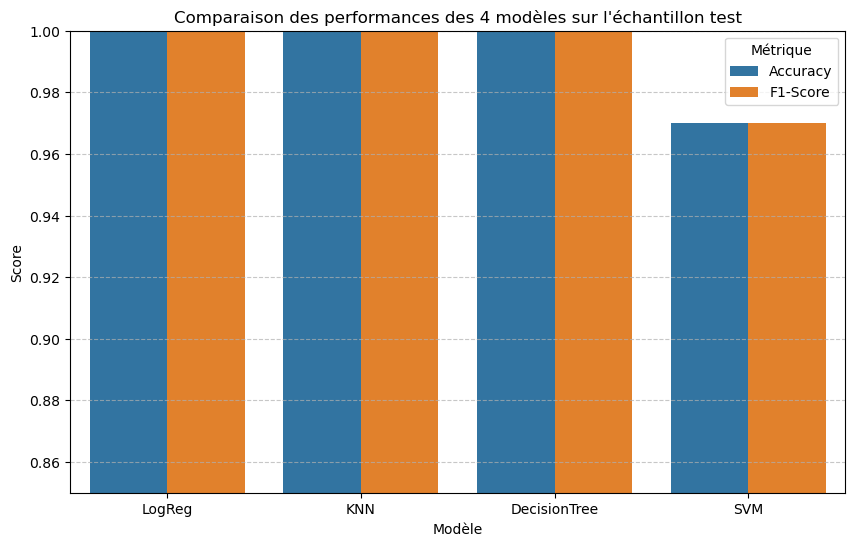

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = {
    'Modèle': ['LogReg', 'KNN', 'DecisionTree', 'SVM'],
    'Accuracy': [1, 1, 1, 0.97],
    'F1-Score': [1, 1, 1, 0.97]
}

df_results = pd.DataFrame(results)

df_melted = df_results.melt(id_vars='Modèle', var_name='Métrique', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Modèle', y='Score', hue='Métrique')
plt.ylim(0.85, 1.0) # Zoomer sur la zone d'excellence
plt.title("Comparaison des performances des 4 modèles sur l'échantillon test")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


CONCLUSION : parmis les 4 modèles, le svm est celui qui à une performance inférieur , ceci s'explique par le fait que le svm a un recall de 0.83 pour la classe virginica, il n'arrive donc pas à identifier cette classe correctement contrairement aux 3 autres modèles qui identifient parfaitement chaque catégorie de fleures